<a href="https://colab.research.google.com/github/Jainish5658/CNNs_CIFAR_Dataset/blob/main/CNN_cifar10_project_advanced_HP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
#importing the neccessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras_tuner.tuners import RandomSearch
import matplotlib.pyplot as plt


In [ ]:
#Loading and pre-processing of the Cifar 10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
#normalizing pixel values to be between 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
#Defining class names for cifar 10 dataset
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
def build_model(hp):
    model = models.Sequential()

    # Tune the number of convolutional layers (1, 2 or 3)
    for i in range(hp.Int('conv_layers', 1, 3)):
        if i == 0:
            model.add(layers.Conv2D(
                filters=hp.Int('filters_' + str(i), min_value=32, max_value=128, step=16),
                kernel_size=3,
                activation='relu',
                input_shape=(32, 32, 3)))
        else:
            model.add(layers.Conv2D(
                filters=hp.Int('filters_' + str(i), min_value=64, max_value=128, step=16),
                kernel_size=3,
                activation='relu',
                padding='same'))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())

    # Tune the number of dense layers (1, 2, or 3)
    for i in range(hp.Int('dense_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=16),
            activation='relu'))

        # Tune the dropout rate
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)))

    # The last dense layer with 10 output units (for 10 classes)
    model.add(layers.Dense(10, activation='softmax'))

    # Choose an optimizer and learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))

    model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    return model


In [ ]:

# Step 5: Define the Tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='cifar10_tunning'
)

# Step 6: Perform the Hyperparameter search
tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Step 7: Get the best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Step 8: Build the model with the best Hyperparameters and train it
model = tuner.hypermodel.build(best_hps)

Trial 10 Complete [00h 00m 55s]
val_accuracy: 0.5336999893188477

Best val_accuracy So Far: 0.6800000071525574
Total elapsed time: 00h 09m 37s


In [ ]:
#training the CNN model
history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))




Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.2975 - loss: 1.8723 - val_accuracy: 0.5518 - val_loss: 1.2727
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5438 - loss: 1.2783 - val_accuracy: 0.6166 - val_loss: 1.0947
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6090 - loss: 1.1194 - val_accuracy: 0.6263 - val_loss: 1.0620
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6417 - loss: 1.0245 - val_accuracy: 0.6713 - val_loss: 0.9487
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6662 - loss: 0.9513 - val_accuracy: 0.6575 - val_loss: 0.9816
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6883 - loss: 0.8960 - val_accuracy: 0.6664 - val_loss: 0.9870
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7087 - loss: 0.8397 - val_accuracy: 0.6826 - val_loss: 0.9275
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7227 - loss: 0.8024

In [ ]:
#evaluation of the performance of the CNN model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print(f'Test accuracy: {test_acc}')



313/313 - 1s - 2ms/step - accuracy: 0.6898 - loss: 0.9416
Test accuracy: 0.6898000240325928


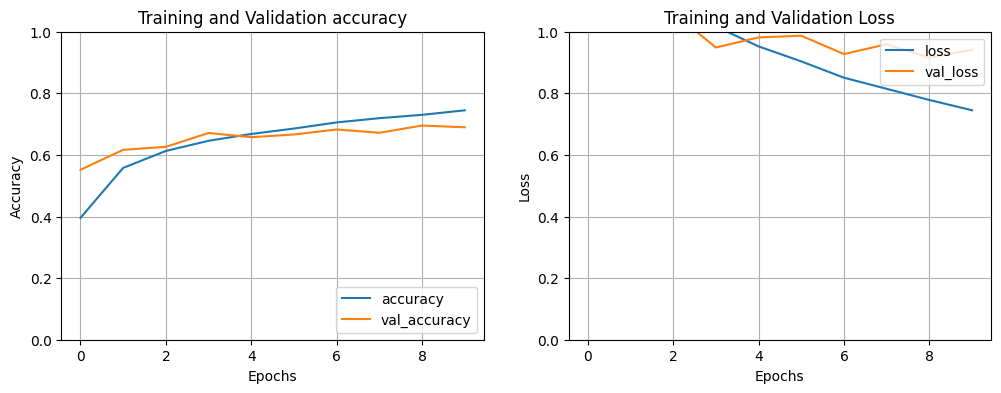

In [ ]:
# plotting the vlaidation and training accuracy and loss values.

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc = 'lower right')
plt.title('Training and Validation accuracy')
plt.grid()



plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.grid()




plt.show()